In [1]:
import warnings
warnings.simplefilter('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from k_means import kMeans
from k_centers import kCenters
from single_swap import singleSwap
from spectral_clustering import spectralClustering
from EM import EM

%matplotlib inline

In [2]:
# read the data
clustering = pd.read_csv('./data/clustering.csv', header=None).values
bigClustering = pd.read_csv('./data/bigClusteringData.csv', header=None).values

# define colors
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', '#7FFFD4', '#9ACD32', '#FFA500']

# I. K-Means Algorithm

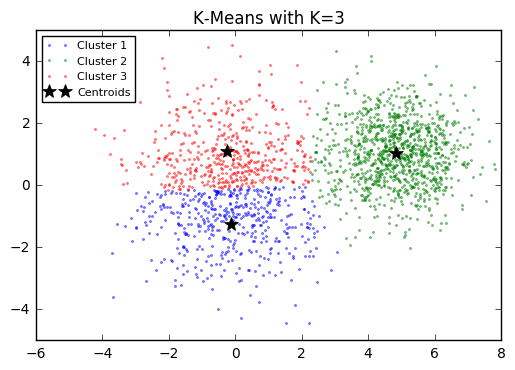

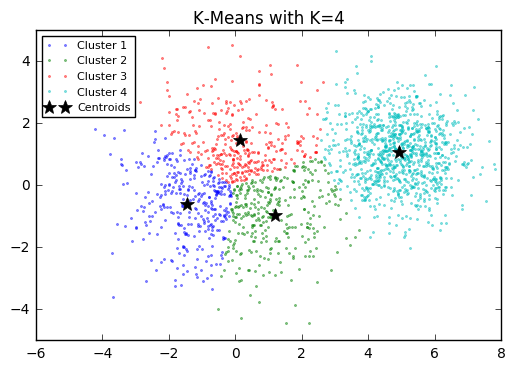

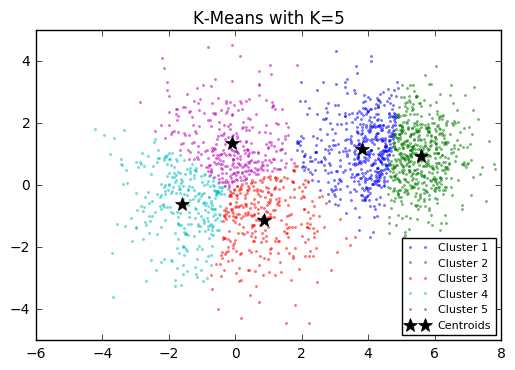

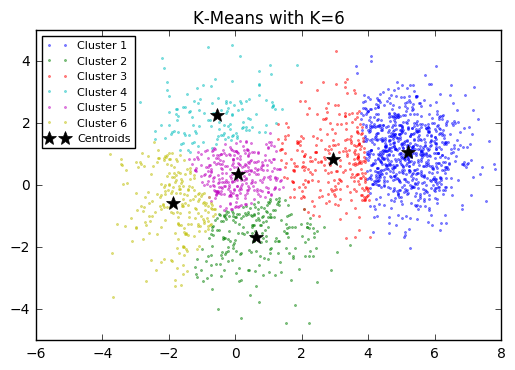

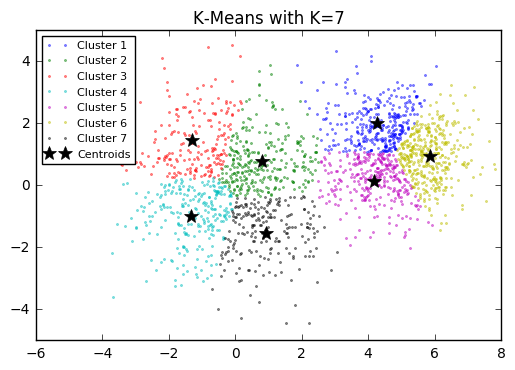

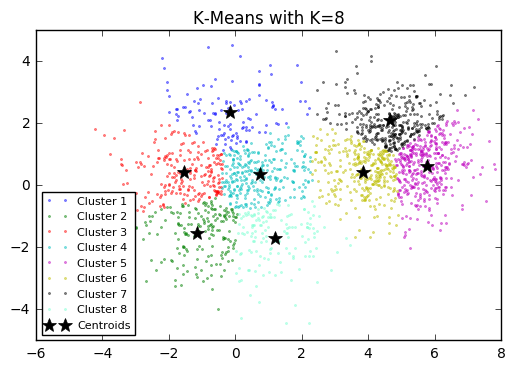

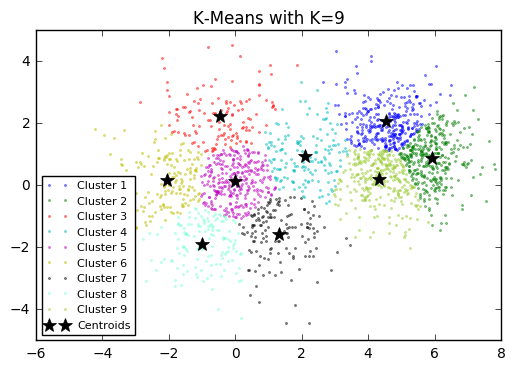

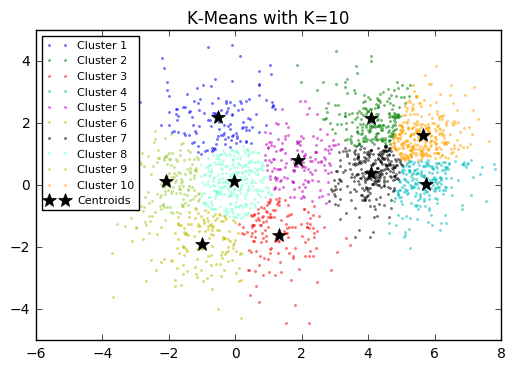

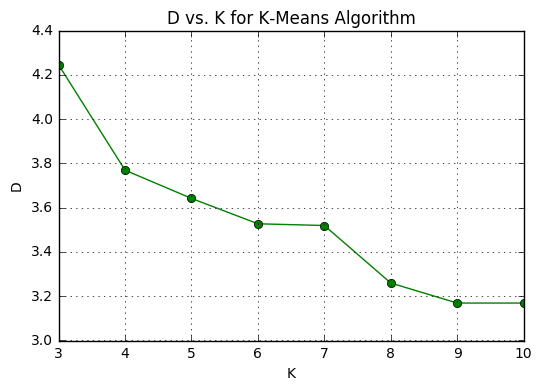

D	 [4.2446660070158311, 3.7691227861002501, 3.6417412559391327, 3.5271231677590462, 3.5192696643449315, 3.2596232380811845, 3.169131574653457, 3.169131574653457]


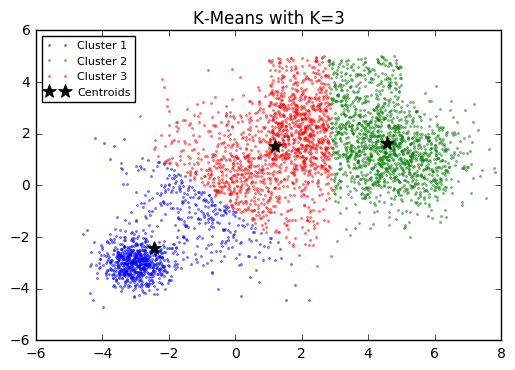

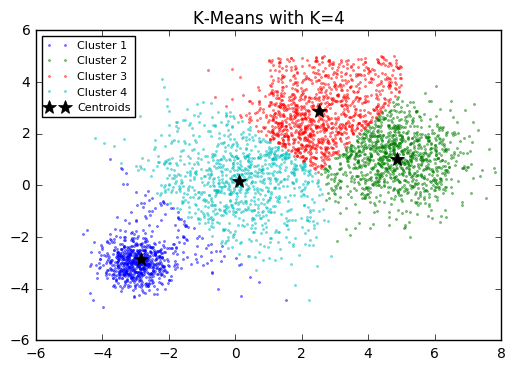

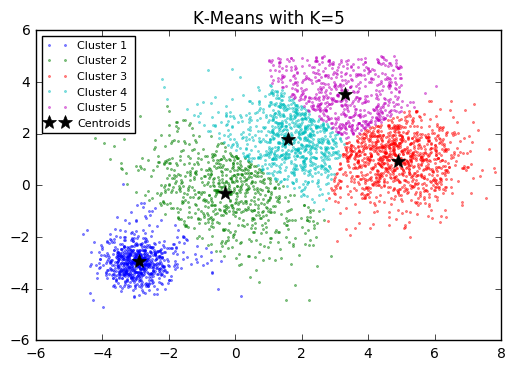

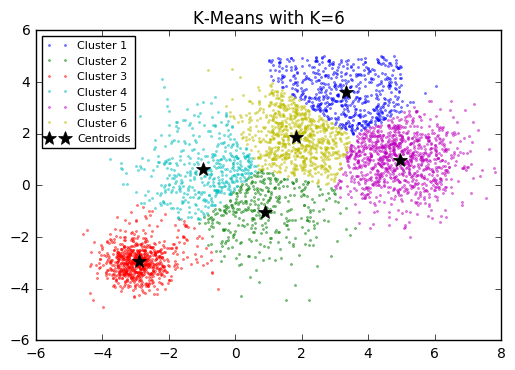

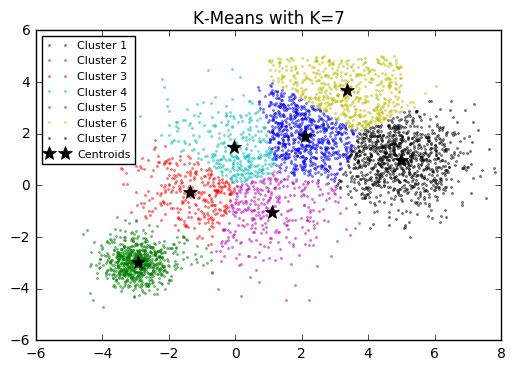

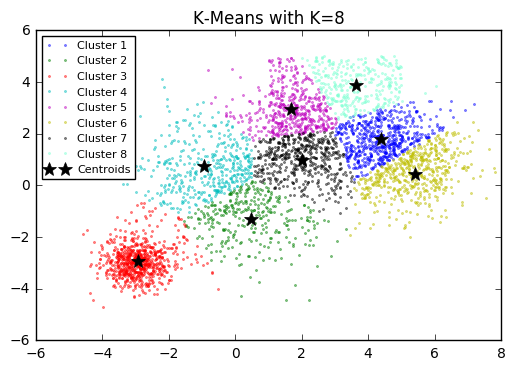

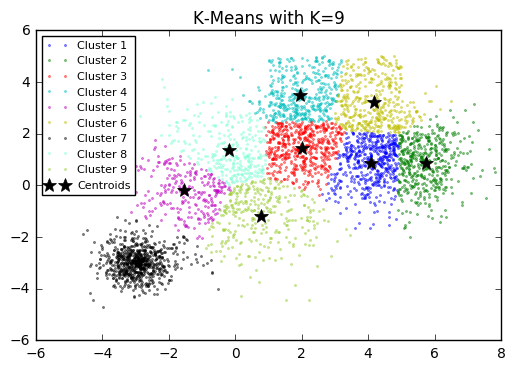

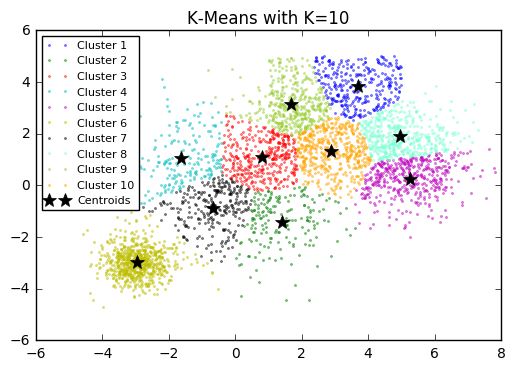

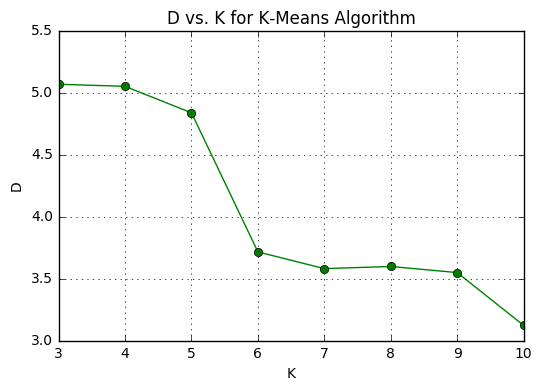

D	 [5.0665142208144074, 5.0497754512058357, 4.836076946072799, 3.7145718463953648, 3.5796555460028334, 3.5970011865553002, 3.5477473322689028, 3.1218703500907705]


In [3]:
# ------------------------------------------------------------------------
# clustering.txt
# ------------------------------------------------------------------------
loss = []
index = []
iteration = 10
tol = 1e-5
X = clustering

for K in [3, 4, 5, 6, 7, 8, 9, 10]:
    best_D = None
    best_C = None
    best_Q = None
    for i in range(iteration):
        Q, C, D = kMeans(X, K, tol=tol, random_state=None, verbose=False)
        if best_D is None:
            best_D = D
            best_C = C
            best_Q = Q
        else:
            if D < best_D:
                best_D = D
                best_C = C
                best_Q = Q
    
    loss.append(best_D)
    index.append(best_C)
    
    # plot the clustered data
    fig, ax = plt.subplots()
    for i in range(K):
        tmp = X[best_C==i, :]
        ax.plot(tmp[:, 0], tmp[:, 1], '.', color=colors[i], 
                alpha=0.5, markersize=3, label='Cluster ' + str(i+1))
    ax.plot(best_Q[:, 0], best_Q[:, 1], '*', color='k', markersize=10, label='Centroids')
    ax.set_title('K-Means with K=' + str(K))
    ax.legend(fontsize=8, loc='best')
    fig.savefig('./result/pdf/clustering_kMeans_' + str(K) + '.pdf')
    fig.savefig('./result/clustering_kMeans_' + str(K) + '.png', dpi=300)
    plt.show()

# ------------------------------------------------------------------------
# plot the change of D versus K
# ------------------------------------------------------------------------
fig, ax = plt.subplots()
ax.plot(range(3, 11), loss, 'go-')
ax.set_title('D vs. K for K-Means Algorithm')
ax.set_xlabel('K')
ax.set_ylabel('D')
ax.grid('on')
fig.savefig('./result/pdf/loss_clustering_kMeans_' + str(K) + '.pdf')
fig.savefig('./result/loss_clustering_kMeans_' + str(K) + '.png', dpi=300)
plt.show()
print('D\t', loss)

# ------------------------------------------------------------------------
# bigClustering.txt
# ------------------------------------------------------------------------
loss = []
index = []
iteration = 10
tol = 1e-5
X = bigClustering

for K in [3, 4, 5, 6, 7, 8, 9, 10]:
    best_D = None
    best_C = None
    best_Q = None
    for i in range(iteration):
        Q, C, D = kMeans(X, K, tol=tol, random_state=None, verbose=False)
        if best_D is None:
            best_D = D
            best_C = C
            best_Q = Q
        else:
            if D < best_D:
                best_D = D
                best_C = C
                best_Q = Q
    
    loss.append(best_D)
    index.append(best_C)
    
    # plot the clustered data
    fig, ax = plt.subplots()
    for i in range(K):
        tmp = X[best_C==i, :]
        ax.plot(tmp[:, 0], tmp[:, 1], '.', color=colors[i], 
                alpha=0.5, markersize=3, label='Cluster ' + str(i+1))
    ax.plot(best_Q[:, 0], best_Q[:, 1], '*', color='k', markersize=10, label='Centroids')
    ax.set_title('K-Means with K=' + str(K))
    ax.legend(fontsize=8, loc='best')
    fig.savefig('./result/pdf/bigClustering_kMeans_' + str(K) + '.pdf')
    fig.savefig('./result/bigClustering_kMeans_' + str(K) + '.png', dpi=300)
    plt.show()

# ------------------------------------------------------------------------
# plot the change of D versus K
# ------------------------------------------------------------------------
fig, ax = plt.subplots()
ax.plot(range(3, 11), loss, 'go-')
ax.set_title('D vs. K for K-Means Algorithm')
ax.set_xlabel('K')
ax.set_ylabel('D')
ax.grid('on')
fig.savefig('./result/pdf/loss_bigClustering_kMeans_' + str(K) + '.pdf')
fig.savefig('./result/loss_bigClustering_kMeans_' + str(K) + '.png', dpi=300)
plt.show()
print('D\t', loss)

# II. Greedy K-Centers Algorithm

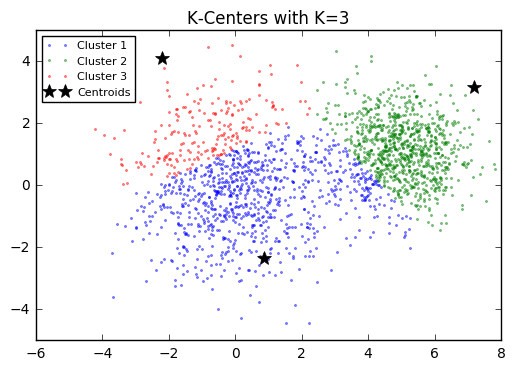

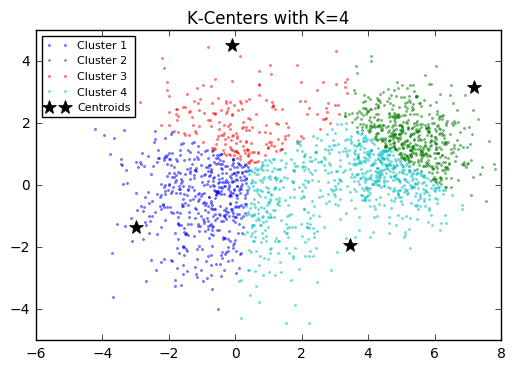

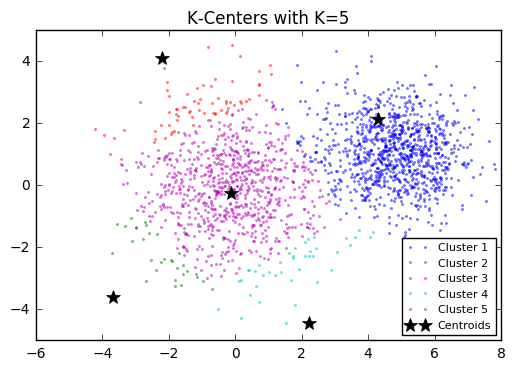

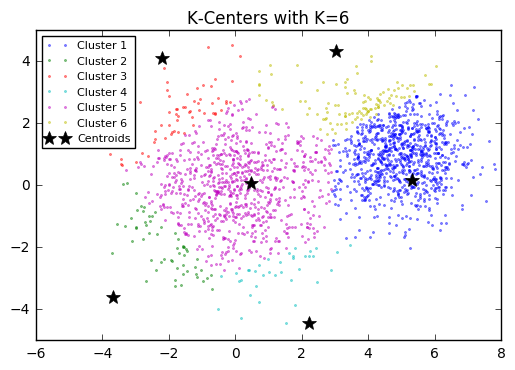

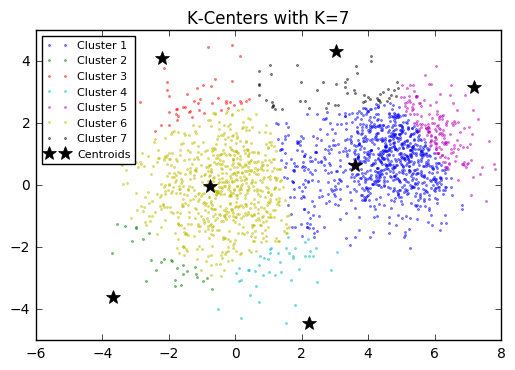

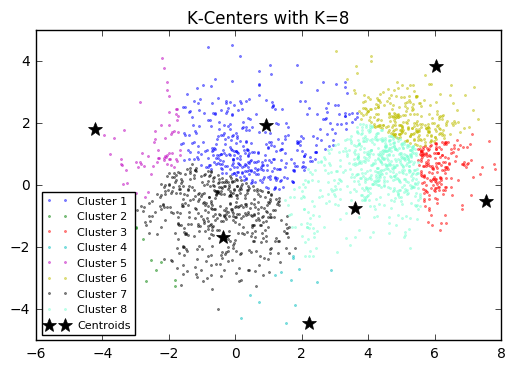

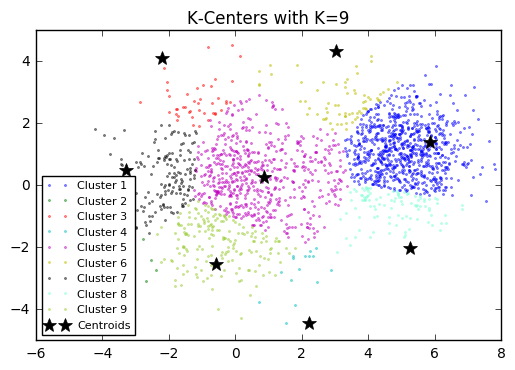

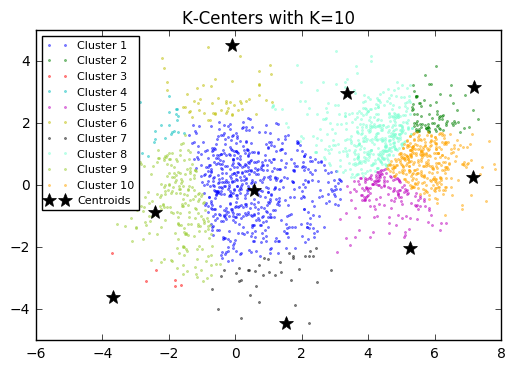

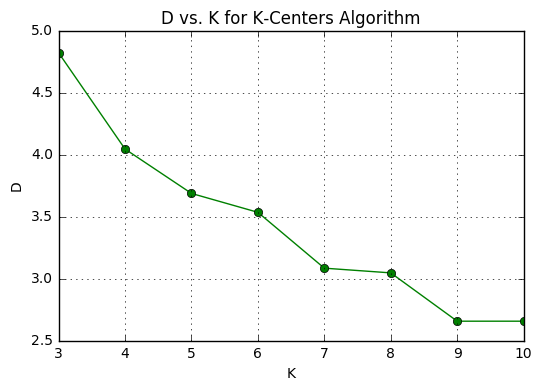

D	 [4.8198096642917347, 4.0438359297701485, 3.6860321349657275, 3.5336915329439842, 3.083331057476637, 3.0453594455170641, 2.6557114433989244, 2.6557114433989244]


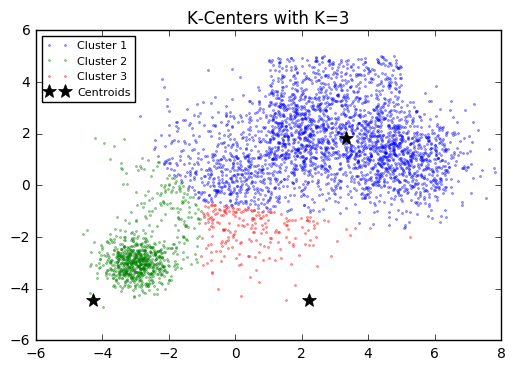

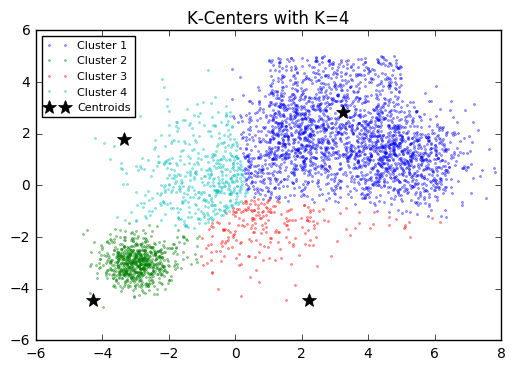

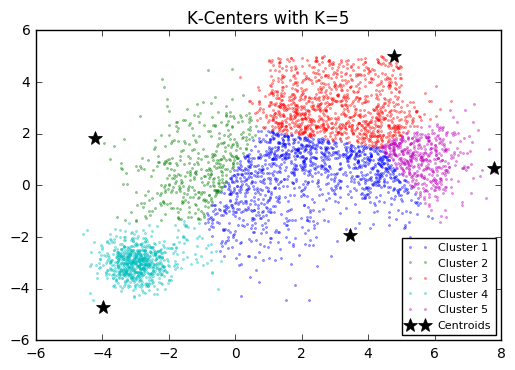

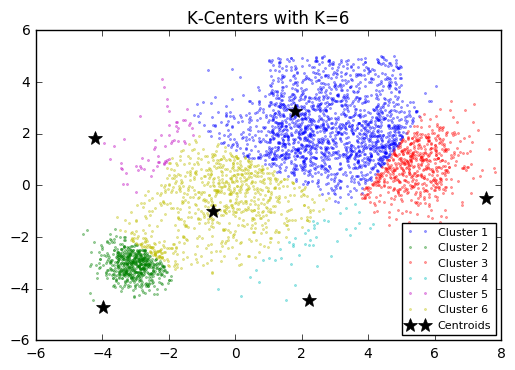

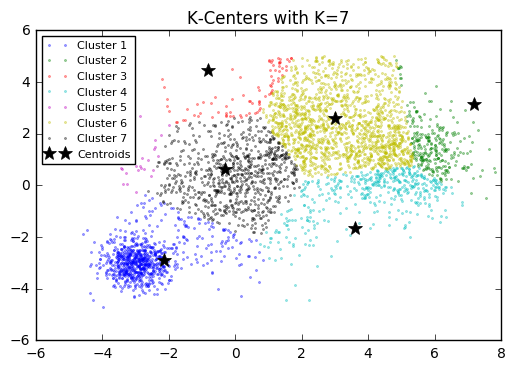

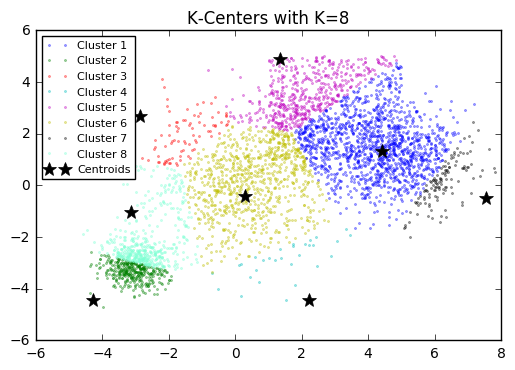

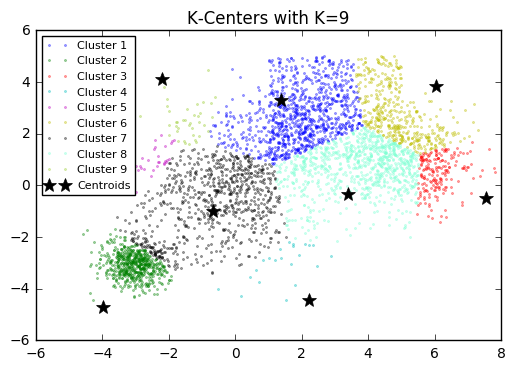

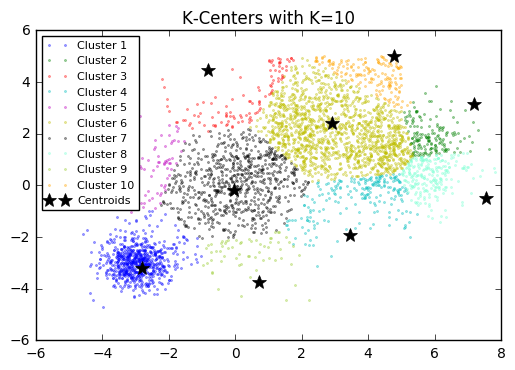

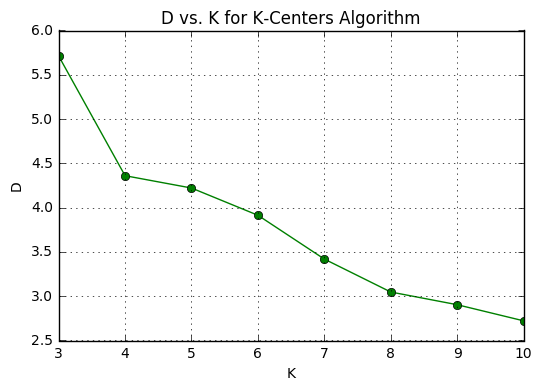

D	 [5.7130323359928576, 4.3606313100742655, 4.2215073614172463, 3.9140418754244313, 3.4192960200748925, 3.0473498683282165, 2.9040772368860992, 2.7220471064990779]


In [4]:
# ------------------------------------------------------------------------
# clustering.txt
# ------------------------------------------------------------------------
loss = []
index = []
iteration = 10
X = clustering

for K in [3, 4, 5, 6, 7, 8, 9, 10]:
    best_D = None
    best_C = None
    best_Q = None
    for i in range(iteration):
        Q, C, D, _ = kCenters(X, K, random_state=None, verbose=False)
        if best_D is None:
            best_D = D
            best_C = C
            best_Q = Q
        else:
            if D < best_D:
                best_D = D
                best_C = C
                best_Q = Q
    
    loss.append(best_D)
    index.append(best_C)
    
    # plot the clustered data
    fig, ax = plt.subplots()
    for i in range(K):
        tmp = X[C==i, :]
        ax.plot(tmp[:, 0], tmp[:, 1], '.', color=colors[i], 
                alpha=0.5, markersize=3, label='Cluster ' + str(i+1))
    ax.plot(Q[:, 0], Q[:, 1], '*', color='k', markersize=10, label='Centroids')
    ax.set_title('K-Centers with K=' + str(K))
    ax.legend(fontsize=8, loc='best')
    fig.savefig('./result/pdf/clustering_kCenter_' + str(K) + '.pdf')
    fig.savefig('./result/clustering_kCenter_' + str(K) + '.png', dpi=300)
    plt.show()

# ------------------------------------------------------------------------
# plot the change of D versus K
# ------------------------------------------------------------------------
fig, ax = plt.subplots()
ax.plot(range(3, 11), loss, 'go-')
ax.set_title('D vs. K for K-Centers Algorithm')
ax.set_xlabel('K')
ax.set_ylabel('D')
ax.grid('on')
fig.savefig('./result/pdf/loss_clustering_kCenter_' + str(K) + '.pdf')
fig.savefig('./result/loss_clustering_kCenter_' + str(K) + '.png', dpi=300)
plt.show()
print('D\t', loss)

# ------------------------------------------------------------------------
# bigClustering.txt
# ------------------------------------------------------------------------
loss = []
index = []
iteration = 10
tol = 1e-5
X = bigClustering

for K in [3, 4, 5, 6, 7, 8, 9, 10]:
    best_D = None
    best_C = None
    best_Q = None
    for i in range(iteration):
        Q, C, D, _ = kCenters(X, K, random_state=None, verbose=False)
        if best_D is None:
            best_D = D
            best_C = C
            best_Q = Q
        else:
            if D < best_D:
                best_D = D
                best_C = C
                best_Q = Q
    
    loss.append(best_D)
    index.append(best_C)
    
    # plot the clustered data
    fig, ax = plt.subplots()
    for i in range(K):
        tmp = X[C==i, :]
        ax.plot(tmp[:, 0], tmp[:, 1], '.', color=colors[i], 
                alpha=0.4, markersize=3, label='Cluster ' + str(i+1))
    ax.plot(Q[:, 0], Q[:, 1], '*', color='k', markersize=10, label='Centroids')
    ax.set_title('K-Centers with K=' + str(K))
    ax.legend(fontsize=8, loc='best')
    fig.savefig('./result/pdf/bigClustering_kCenter_' + str(K) + '.pdf')
    fig.savefig('./result/bigClustering_kCenter_' + str(K) + '.png', dpi=300)
    plt.show()

# ------------------------------------------------------------------------
# plot the change of D versus K
# ------------------------------------------------------------------------
fig, ax = plt.subplots()
ax.plot(range(3, 11), loss, 'go-')
ax.set_title('D vs. K for K-Centers Algorithm')
ax.set_xlabel('K')
ax.set_ylabel('D')
ax.grid('on')
fig.savefig('./result/pdf/loss_bigClustering_kCenter_' + str(K) + '.pdf')
fig.savefig('./result/loss_bigClustering_kCenter_' + str(K) + '.png', dpi=300)
plt.show()
print('D\t', loss)

# III. Single-Swap Algorithm

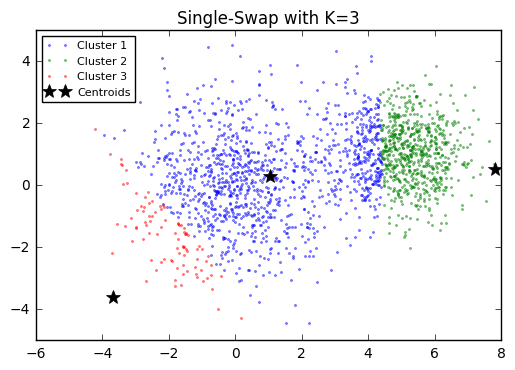

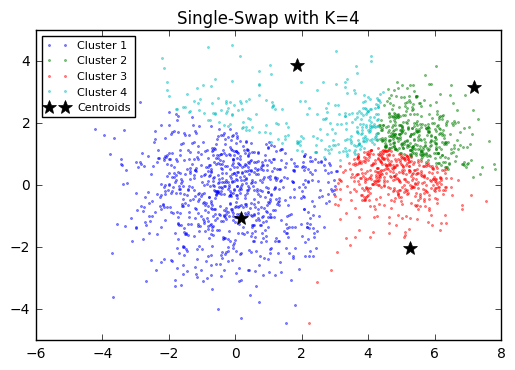

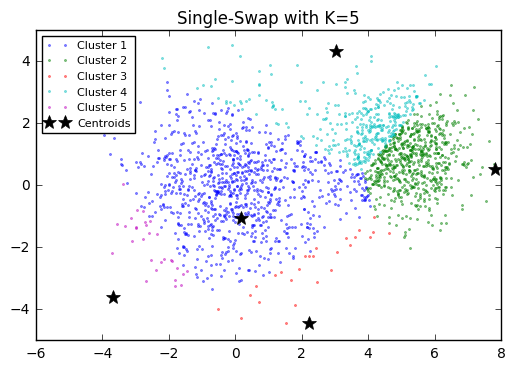

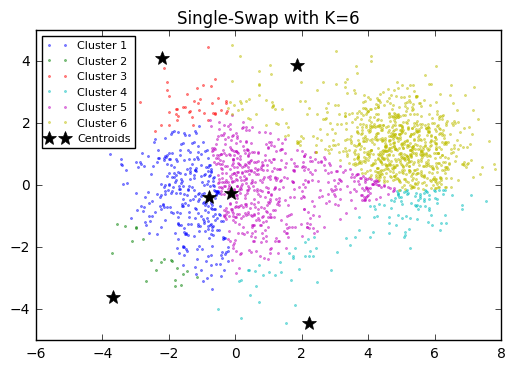

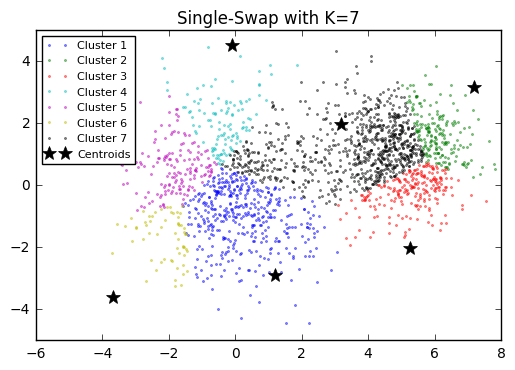

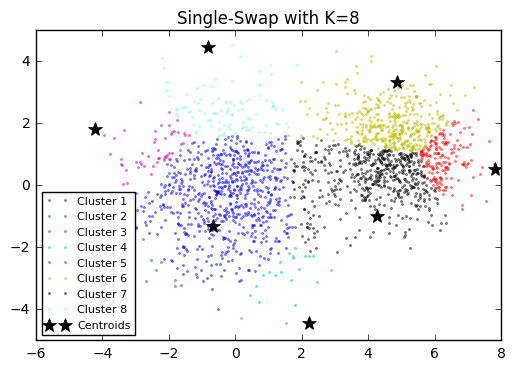

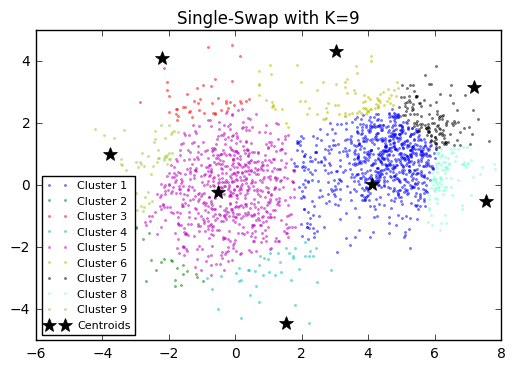

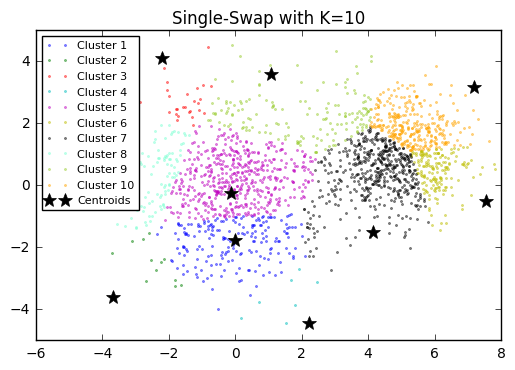

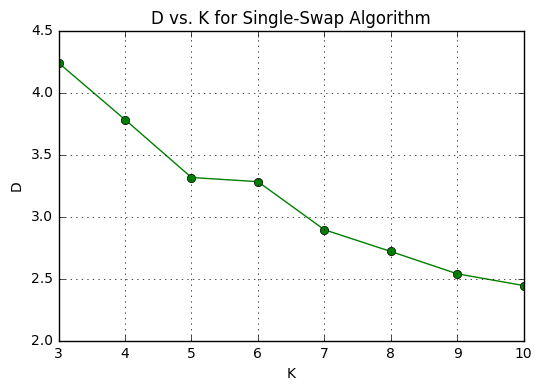

D	 [4.2384293426338964, 3.7810319052872328, 3.3144038679678132, 3.2810128291885725, 2.8933625355976393, 2.7179965894018339, 2.5378853973337723, 2.4432323393406534]


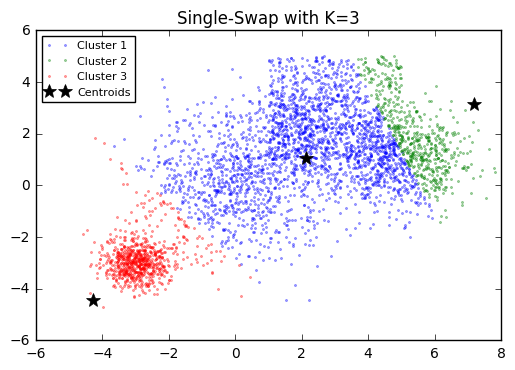

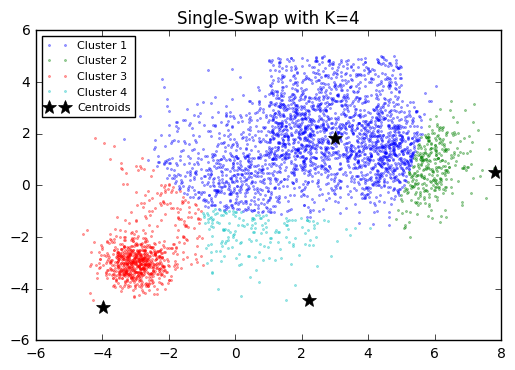

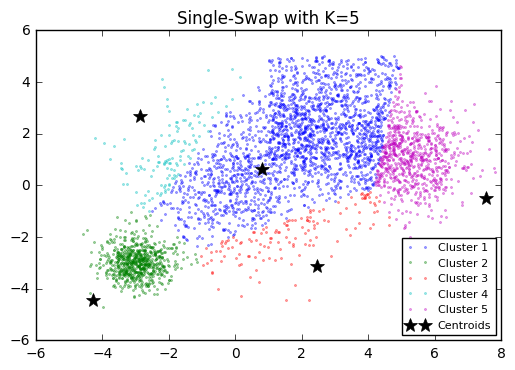

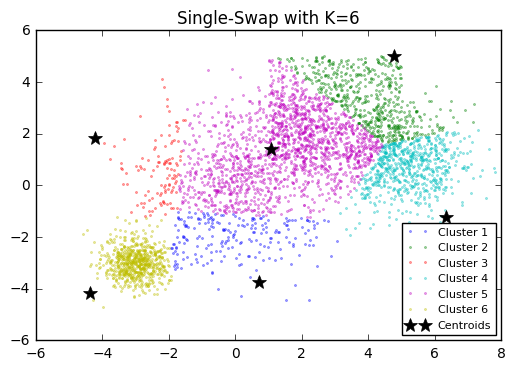

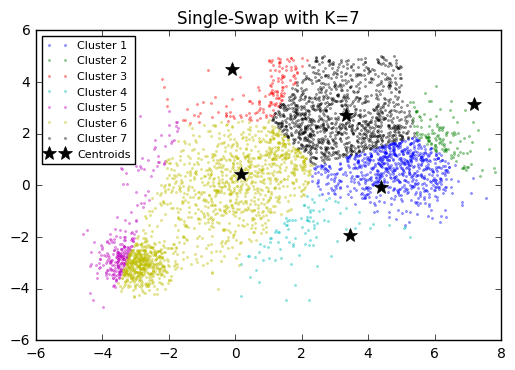

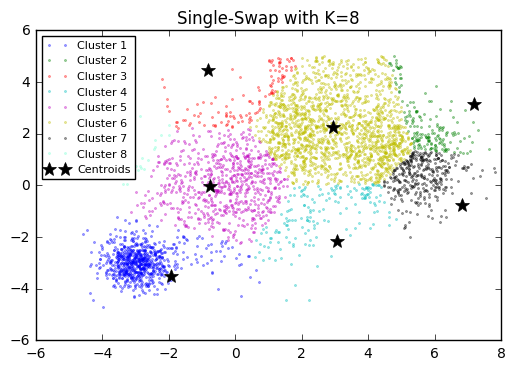

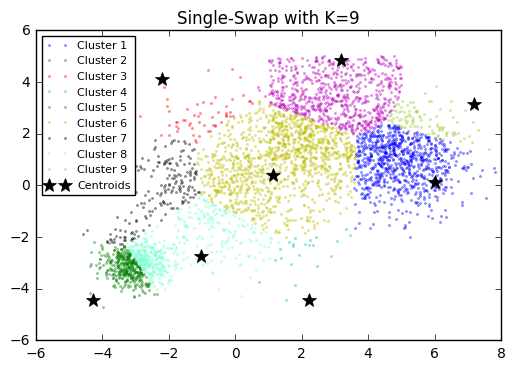

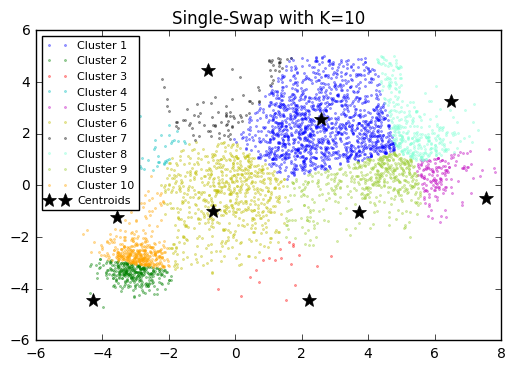

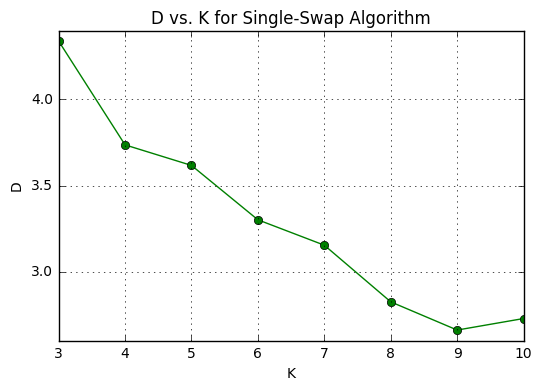

D	 [4.3387592927010834, 3.7359074413052573, 3.6165907247157514, 3.3008120269412498, 3.1533181918258739, 2.8242919594298321, 2.6606215040099181, 2.7276436981578072]


In [5]:
# ------------------------------------------------------------------------
# clustering.txt
# ------------------------------------------------------------------------
loss = []
index = []
iteration = 10
tau = 0.05
X = clustering

for K in [3, 4, 5, 6, 7, 8, 9, 10]:
    best_D = None
    best_C = None
    best_Q = None
    for i in range(iteration):
        Q, C, D = singleSwap(X, K, tau=tau, random_state=None, verbose=False)
        if best_D is None:
            best_D = D
            best_C = C
            best_Q = Q
        else:
            if D < best_D:
                best_D = D
                best_C = C
                best_Q = Q
    
    loss.append(best_D)
    index.append(best_C)
    
    # plot the clustered data
    fig, ax = plt.subplots()
    for i in range(K):
        tmp = X[C==i, :]
        ax.plot(tmp[:, 0], tmp[:, 1], '.', color=colors[i], 
                alpha=0.5, markersize=3, label='Cluster ' + str(i+1))
    ax.plot(Q[:, 0], Q[:, 1], '*', color='k', markersize=10, label='Centroids')
    ax.set_title('Single-Swap with K=' + str(K))
    ax.legend(fontsize=8, loc='best')
    fig.savefig('./result/pdf/clustering_singleSwap_' + str(K) + '.pdf')
    fig.savefig('./result/clustering_singleSwap_' + str(K) + '.png', dpi=300)
    plt.show()

# ------------------------------------------------------------------------
# plot the change of D versus K
# ------------------------------------------------------------------------
fig, ax = plt.subplots()
ax.plot(range(3, 11), loss, 'go-')
ax.set_title('D vs. K for Single-Swap Algorithm')
ax.set_xlabel('K')
ax.set_ylabel('D')
ax.grid('on')
fig.savefig('./result/pdf/loss_clustering_singleSwap_' + str(K) + '.pdf')
fig.savefig('./result/loss_clustering_singleSwap_' + str(K) + '.png', dpi=300)
plt.show()
print('D\t', loss)

# ------------------------------------------------------------------------
# bigClustering.txt
# ------------------------------------------------------------------------
loss = []
index = []
iteration = 10
tau = 0.05
X = bigClustering

for K in [3, 4, 5, 6, 7, 8, 9, 10]:
    best_D = None
    best_C = None
    best_Q = None
    for i in range(iteration):
        Q, C, D = singleSwap(X, K, tau=tau, random_state=None, verbose=False)
        if best_D is None:
            best_D = D
            best_C = C
            best_Q = Q
        else:
            if D < best_D:
                best_D = D
                best_C = C
                best_Q = Q
    
    loss.append(best_D)
    index.append(best_C)
    
    # plot the clustered data
    fig, ax = plt.subplots()
    for i in range(K):
        tmp = X[C==i, :]
        ax.plot(tmp[:, 0], tmp[:, 1], '.', color=colors[i], 
                alpha=0.4, markersize=3, label='Cluster ' + str(i+1))
    ax.plot(Q[:, 0], Q[:, 1], '*', color='k', markersize=10, label='Centroids')
    ax.set_title('Single-Swap with K=' + str(K))
    ax.legend(fontsize=8, loc='best')
    fig.savefig('./result/pdf/bigClustering_singleSwap_' + str(K) + '.pdf')
    fig.savefig('./result/bigClustering_singleSwap_' + str(K) + '.png', dpi=300)
    plt.show()

# ------------------------------------------------------------------------
# plot the change of D versus K
# ------------------------------------------------------------------------
fig, ax = plt.subplots()
ax.plot(range(3, 11), loss, 'go-')
ax.set_title('D vs. K for Single-Swap Algorithm')
ax.set_xlabel('K')
ax.set_ylabel('D')
ax.grid('on')
fig.savefig('./result/pdf/loss_bigClustering_singleSwap_' + str(K) + '.pdf')
fig.savefig('./result/loss_bigClustering_singleSwap_' + str(K) + '.png', dpi=300)
plt.show()
print('D\t', loss)

# IV. Spectral Clustering Algorithm

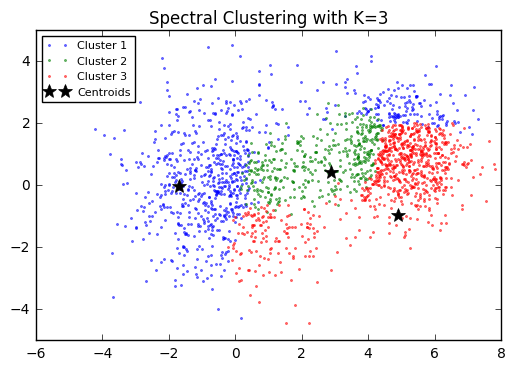

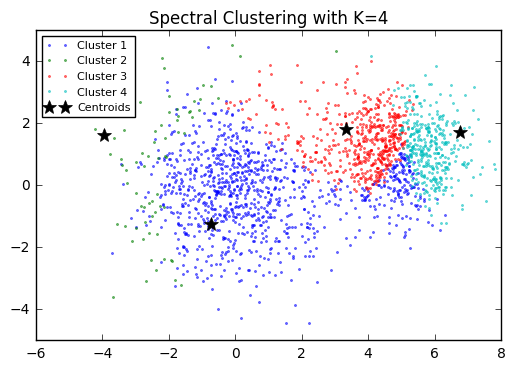

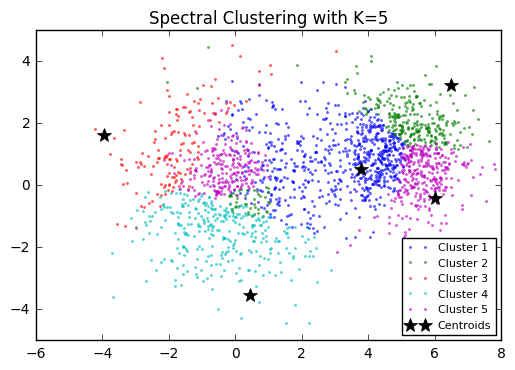

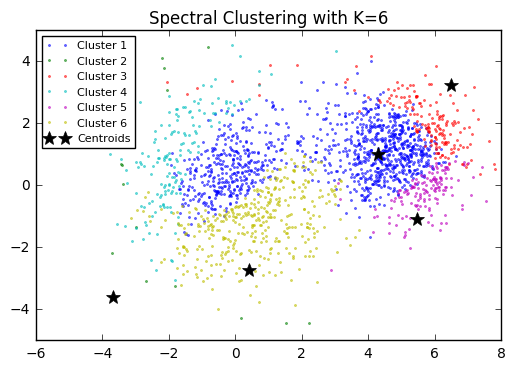

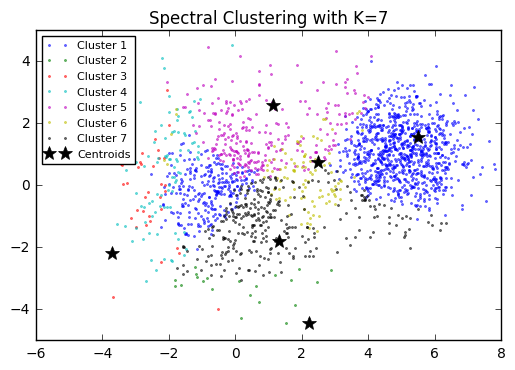

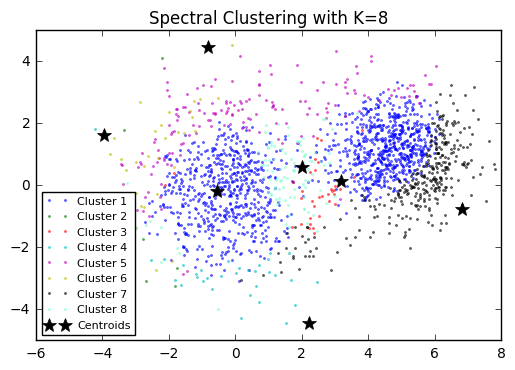

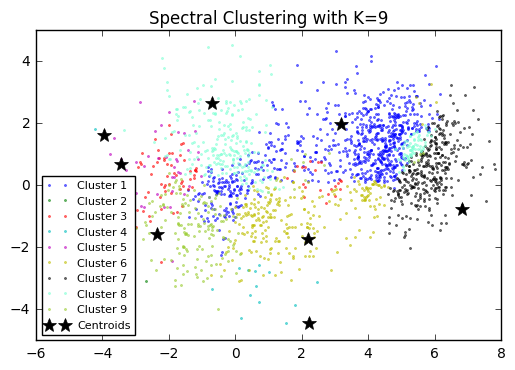

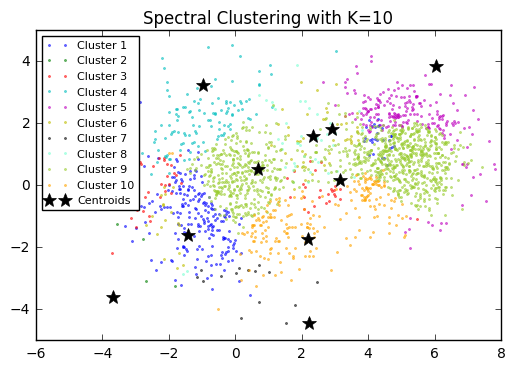

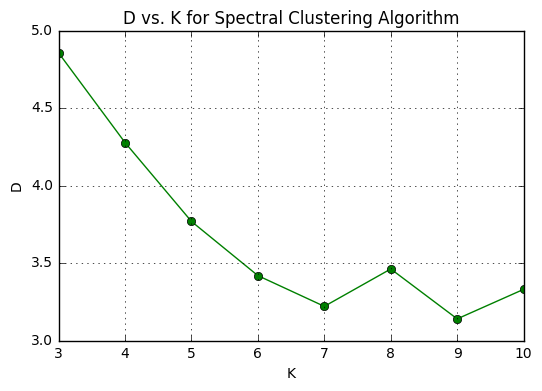

D	 [4.8552956418739317, 4.2767495046705744, 3.7680405265867298, 3.4185248459679216, 3.2202624504844324, 3.4615578347905731, 3.139463019371306, 3.3300860319216978]


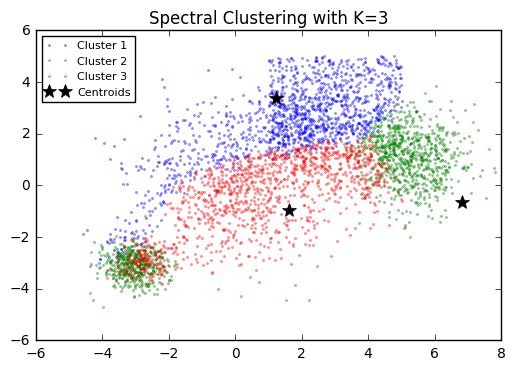

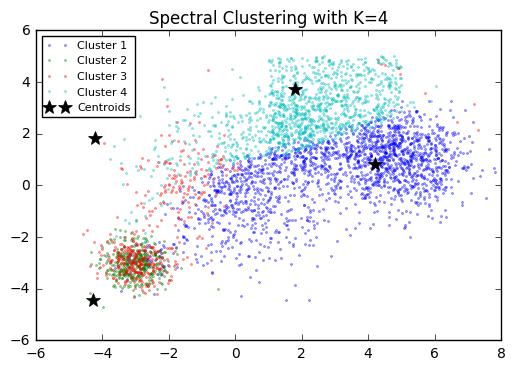

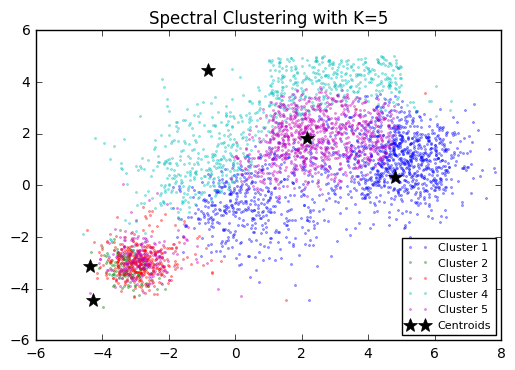

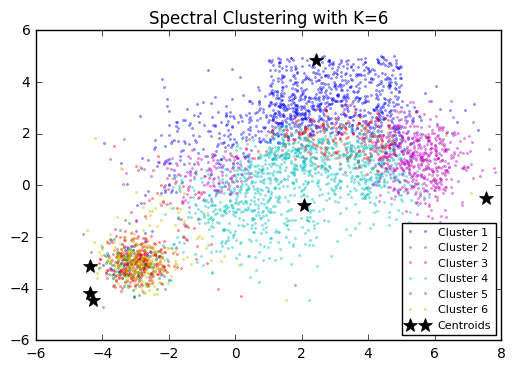

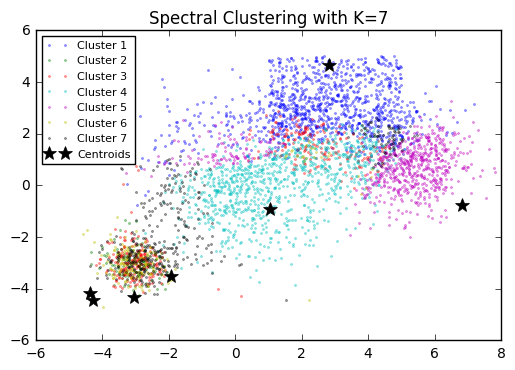

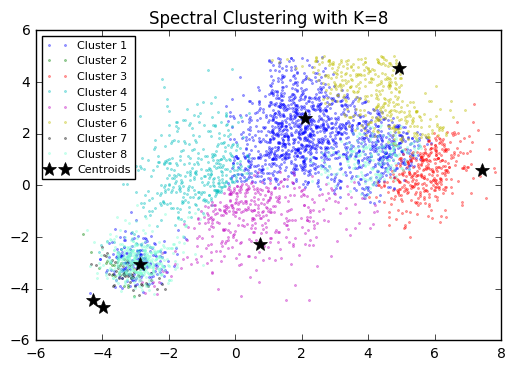

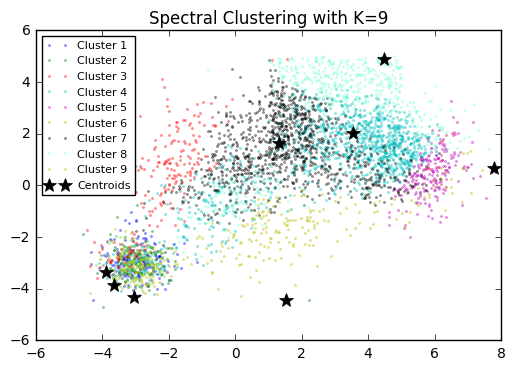

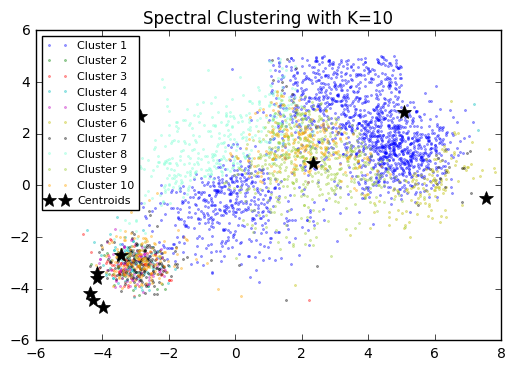

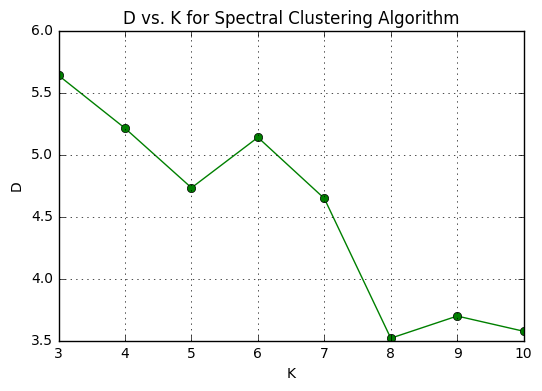

D	 [5.6372257695518986, 5.2115501973980836, 4.7313760180416873, 5.1380437181869132, 4.6454725913409503, 3.51856354669061, 3.6972333605548893, 3.5746595152545653]


In [6]:
# ------------------------------------------------------------------------
# clustering.txt
# ------------------------------------------------------------------------
loss = []
index = []
iteration = 10
X = clustering

for K in [3, 4, 5, 6, 7, 8, 9, 10]:
    best_D = None
    best_C = None
    best_Q = None
    for i in range(iteration):
        W, U, Q, C, D = spectralClustering(X, K, random_state=None, verbose=False)
        if best_D is None:
            best_D = D
            best_C = C
            best_Q = Q
        else:
            if D < best_D:
                best_D = D
                best_C = C
                best_Q = Q
    
    loss.append(best_D)
    index.append(best_C)
    
    # plot the clustered data
    fig, ax = plt.subplots()
    for i in range(K):
        tmp = X[C==i, :]
        ax.plot(tmp[:, 0], tmp[:, 1], '.', color=colors[i], 
                alpha=0.6, markersize=3, label='Cluster ' + str(i+1))
    ax.plot(Q[:, 0], Q[:, 1], '*', color='k', markersize=10, label='Centroids')
    ax.set_title('Spectral Clustering with K=' + str(K))
    ax.legend(fontsize=8, loc='best')
    fig.savefig('./result/pdf/clustering_spectral_' + str(K) + '.pdf')
    fig.savefig('./result/clustering_spectral_' + str(K) + '.png', dpi=300)
    plt.show()

# ------------------------------------------------------------------------
# plot the change of D versus K
# ------------------------------------------------------------------------
fig, ax = plt.subplots()
ax.plot(range(3, 11), loss, 'go-')
ax.set_title('D vs. K for Spectral Clustering Algorithm')
ax.set_xlabel('K')
ax.set_ylabel('D')
ax.grid('on')
fig.savefig('./result/pdf/loss_clustering_spectral_' + str(K) + '.pdf')
fig.savefig('./result/loss_clustering_spectral_' + str(K) + '.png', dpi=300)
plt.show()
print('D\t', loss)

# ------------------------------------------------------------------------
# bigClustering.txt
# ------------------------------------------------------------------------
loss = []
index = []
iteration = 10
tol = 1e-5
X = bigClustering

for K in [3, 4, 5, 6, 7, 8, 9, 10]:
    best_D = None
    best_C = None
    best_Q = None
    for i in range(iteration):
        W, U, Q, C, D = spectralClustering(X, K, random_state=None, verbose=False)
        if best_D is None:
            best_D = D
            best_C = C
            best_Q = Q
        else:
            if D < best_D:
                best_D = D
                best_C = C
                best_Q = Q
    
    loss.append(best_D)
    index.append(best_C)
    
    # plot the clustered data
    fig, ax = plt.subplots()
    for i in range(K):
        tmp = X[C==i, :]
        ax.plot(tmp[:, 0], tmp[:, 1], '.', color=colors[i], 
                alpha=0.4, markersize=3, label='Cluster ' + str(i+1))
    ax.plot(Q[:, 0], Q[:, 1], '*', color='k', markersize=10, label='Centroids')
    ax.set_title('Spectral Clustering with K=' + str(K))
    ax.legend(fontsize=8, loc='best')
    fig.savefig('./result/pdf/bigClustering_spectral_' + str(K) + '.pdf')
    fig.savefig('./result/bigClustering_spectral_' + str(K) + '.png', dpi=300)
    plt.show()

# ------------------------------------------------------------------------
# plot the change of D versus K
# ------------------------------------------------------------------------
fig, ax = plt.subplots()
ax.plot(range(3, 11), loss, 'go-')
ax.set_title('D vs. K for Spectral Clustering Algorithm')
ax.set_xlabel('K')
ax.set_ylabel('D')
ax.grid('on')
fig.savefig('./result/pdf/loss_bigClustering_spectral_' + str(K) + '.pdf')
fig.savefig('./result/loss_bigClustering_spectral_' + str(K) + '.png', dpi=300)
plt.show()
print('D\t', loss)

# V. EM Algorithm

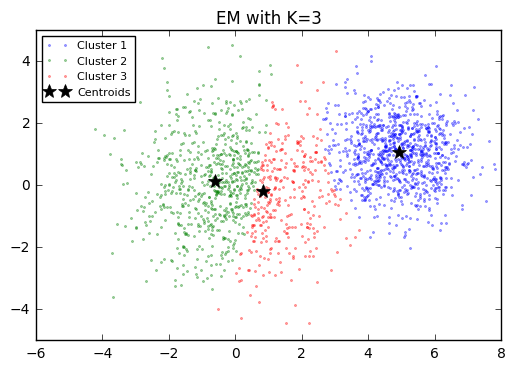

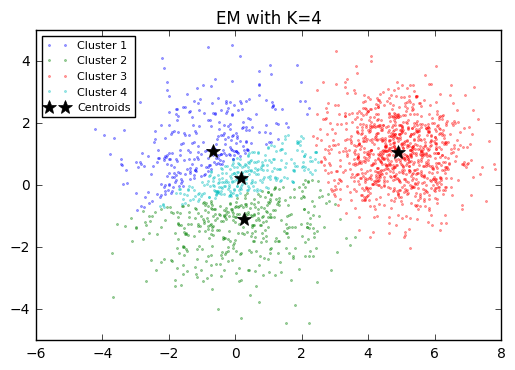

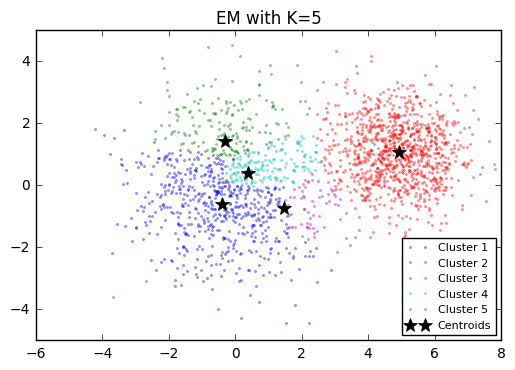

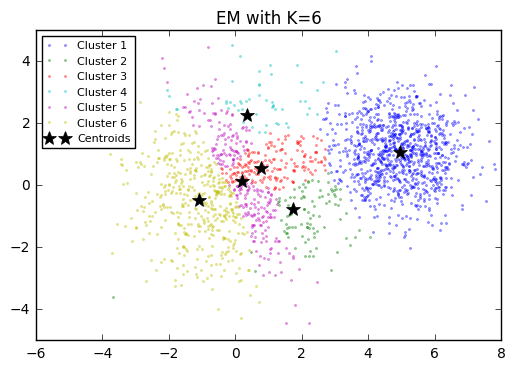

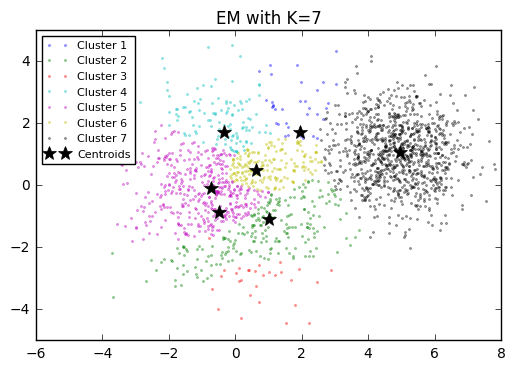

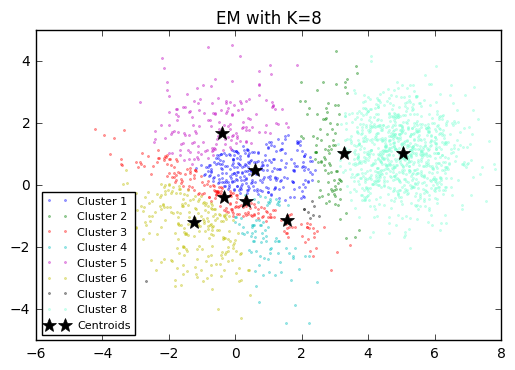

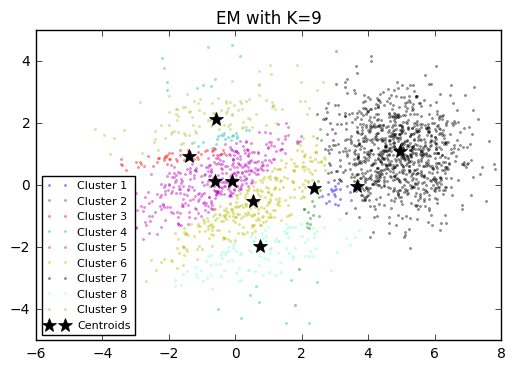

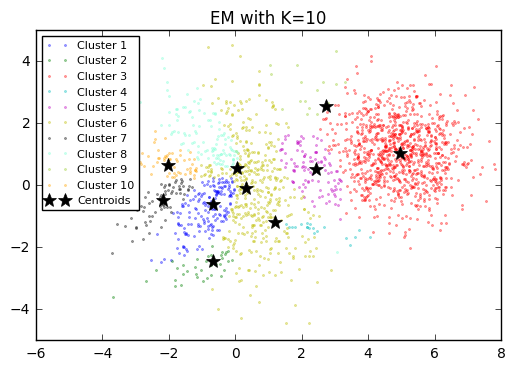

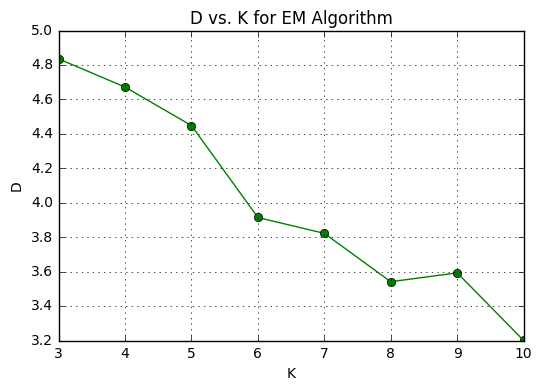

D	 [4.8353485205359155, 4.6715838453860972, 4.4478972473308502, 3.914217507124103, 3.8219811738368725, 3.5412625324169054, 3.592867413880243, 3.2001946202197362]


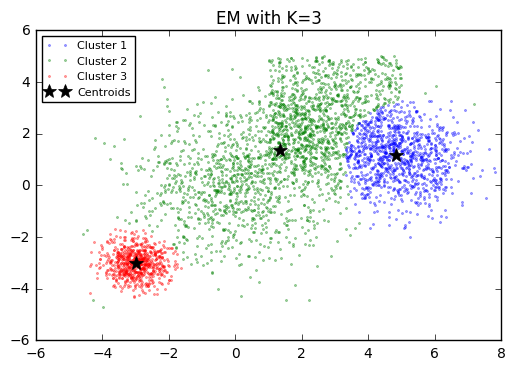

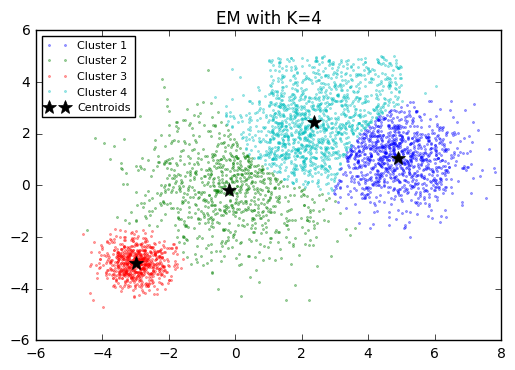

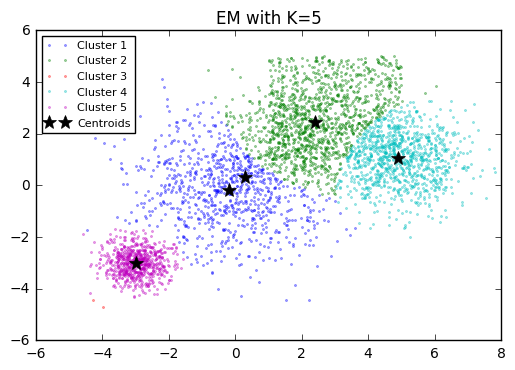

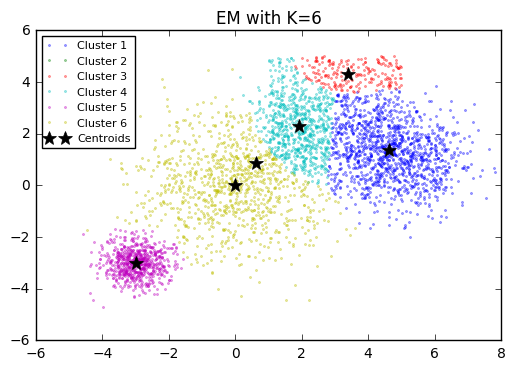

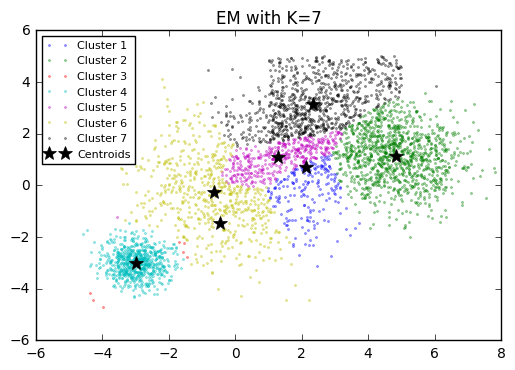

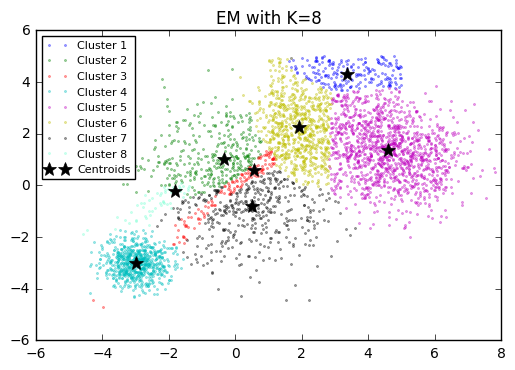

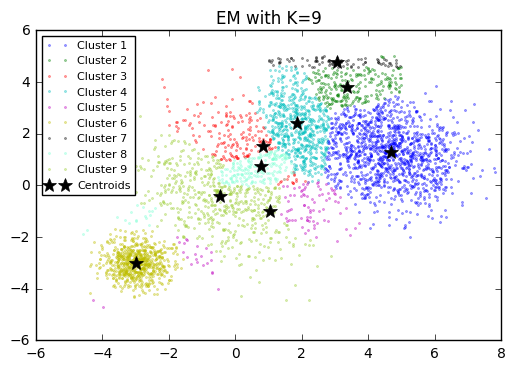

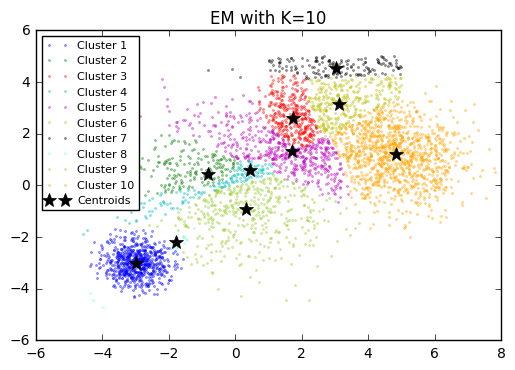

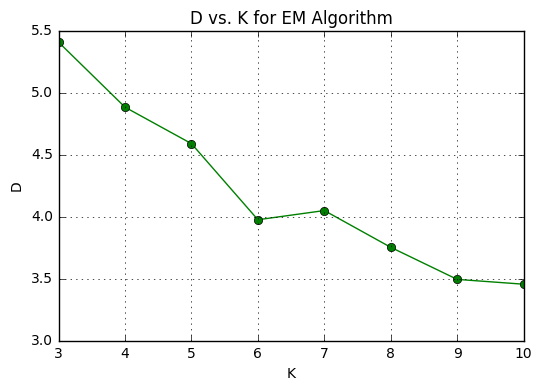

D	 [5.4054199046061111, 4.8814024245718013, 4.587412762066811, 3.9738890631146013, 4.0479861344108263, 3.7514476794793685, 3.4929058098264067, 3.4539805570095004]


In [7]:
# ------------------------------------------------------------------------
# clustering.txt
# ------------------------------------------------------------------------
loss = []
index = []
iteration = 10
threshold = 1e-7
X = clustering

for K in [3, 4, 5, 6, 7, 8, 9, 10]:
    best_D = None
    best_C = None
    best_Q = None
    for i in range(iteration):
        em = EM(m=K, threshold=threshold, random_state=None, maxIter=500)
        em.train(X, verbose=False)  # train the EM model

        # get the label
        C = em.get_label()  # label for each x
        Q = np.array(em.mu)  # cluster centers
        D = em.D

        if best_D is None:
            best_D = D
            best_C = C
            best_Q = Q
        else:
            if D < best_D:
                best_D = D
                best_C = C
                best_Q = Q
    
    loss.append(best_D)
    index.append(best_C)
    
    # plot the clustered data
    fig, ax = plt.subplots()
    for i in range(K):
        tmp = X[C==i, :]
        ax.plot(tmp[:, 0], tmp[:, 1], '.', color=colors[i], 
                alpha=0.4, markersize=3, label='Cluster ' + str(i+1))
    ax.plot(Q[:, 0], Q[:, 1], '*', color='k', markersize=10, label='Centroids')
    ax.set_title('EM with K=' + str(K))
    ax.legend(fontsize=8, loc='best')
    fig.savefig('./result/pdf/clustering_EM_' + str(K) + '.pdf')
    fig.savefig('./result/clustering_EM_' + str(K) + '.png', dpi=300)
    plt.show()

# ------------------------------------------------------------------------
# plot the change of D versus K
# ------------------------------------------------------------------------
fig, ax = plt.subplots()
ax.plot(range(3, 11), loss, 'go-')
ax.set_title('D vs. K for EM Algorithm')
ax.set_xlabel('K')
ax.set_ylabel('D')
ax.grid('on')
fig.savefig('./result/pdf/loss_clustering_EM_' + str(K) + '.pdf')
fig.savefig('./result/loss_clustering_EM_' + str(K) + '.png', dpi=300)
plt.show()
print('D\t', loss)

# ------------------------------------------------------------------------
# bigClustering.txt
# ------------------------------------------------------------------------
loss = []
index = []
iteration = 10
threshold = 1e-7
X = bigClustering

for K in [3, 4, 5, 6, 7, 8, 9, 10]:
    best_D = None
    best_C = None
    best_Q = None
    for i in range(iteration):
        em = EM(m=K, threshold=threshold, random_state=None, maxIter=500)
        em.train(X, verbose=False)  # train the EM model

        # get the label
        C = em.get_label()  # label for each x
        Q = np.array(em.mu)  # cluster centers
        D = em.D
        
        if best_D is None:
            best_D = D
            best_C = C
            best_Q = Q
        else:
            if D < best_D:
                best_D = D
                best_C = C
                best_Q = Q
    
    loss.append(best_D)
    index.append(best_C)
    
    # plot the clustered data
    fig, ax = plt.subplots()
    for i in range(K):
        tmp = X[C==i, :]
        ax.plot(tmp[:, 0], tmp[:, 1], '.', color=colors[i], 
                alpha=0.4, markersize=3, label='Cluster ' + str(i+1))
    ax.plot(Q[:, 0], Q[:, 1], '*', color='k', markersize=10, label='Centroids')
    ax.set_title('EM with K=' + str(K))
    ax.legend(fontsize=8, loc='best')
    fig.savefig('./result/pdf/bigClustering_EM_' + str(K) + '.pdf')
    fig.savefig('./result/bigClustering_EM_' + str(K) + '.png', dpi=300)
    plt.show()

# ------------------------------------------------------------------------
# plot the change of D versus K
# ------------------------------------------------------------------------
fig, ax = plt.subplots()
ax.plot(range(3, 11), loss, 'go-')
ax.set_title('D vs. K for EM Algorithm')
ax.set_xlabel('K')
ax.set_ylabel('D')
ax.grid('on')
fig.savefig('./result/pdf/loss_bigClustering_EM_' + str(K) + '.pdf')
fig.savefig('./result/loss_bigClustering_EM_' + str(K) + '.png', dpi=300)
plt.show()
print('D\t', loss)